In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('HiveLink - Sheet1.csv')
df_clean = df.iloc[1:865].copy()

In [46]:
df_clean.tail()

,Date,Time,Hive Temperature( °C ),Hive Humidity( % ),Supplement Quantity( mL ),Weight(Grams)
860,10/31/2023,11:01 PM,28.7,56,409,4.86
861,10/31/2023,11:02 PM,28.8,56,424,5.86
862,10/31/2023,11:03 PM,28.8,56,406,10.07
863,10/31/2023,11:04 PM,28.8,56,404,5.76
864,10/31/2023,11:05 PM,28.8,55,412,4.85


In [47]:
null_values = df_clean.isnull().sum()
null_values

Date                         0
Time                         0
Hive Temperature( °C )       0
Hive Humidity( % )           0
Supplement Quantity( mL )    0
Weight(Grams)                0
dtype: int64

In [48]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['Time'] = pd.to_datetime(df_clean['Time'])

#Merge Date and Time as DateTime
df_clean.loc[:,'DateTime'] = df_clean['Date'] + pd.to_timedelta(df_clean['Time'].dt.strftime('%H:%M:%S'))



/var/folders/pw/8gfpzrg9039fnszhf4cd8gfr0000gn/T/ipykernel_96116/226771687.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Time'] = pd.to_datetime(df_clean['Time'])


In [49]:
df_clean.head()

,Date,Time,Hive Temperature( °C ),Hive Humidity( % ),Supplement Quantity( mL ),Weight(Grams),DateTime
1,2023-09-02,2023-11-30 19:47:00,31.3,51,370,8350.84,2023-09-02 19:47:00
2,2023-09-02,2023-11-30 19:48:00,31.4,52,365,8347.51,2023-09-02 19:48:00
3,2023-09-02,2023-11-30 19:49:00,31.4,52,356,8351.14,2023-09-02 19:49:00
4,2023-09-02,2023-11-30 19:50:00,31.4,53,358,8348.68,2023-09-02 19:50:00
5,2023-09-02,2023-11-30 19:51:00,31.4,53,362,8347.30,2023-09-02 19:51:00


In [50]:
#Getting the starting time of the dataset
start_time = df_clean['DateTime'].iloc[0]
reference_point = pd.to_datetime(start_time)

In [51]:
df_clean.drop(['Date', 'Time'], axis=1,inplace=True)

In [52]:
#Convert DateTime to numeric
df_clean['DateTime_numeric'] = (df_clean['DateTime'] - reference_point).dt.total_seconds()/60

In [53]:

processed_df = df_clean[['DateTime_numeric','Supplement Quantity( mL )']]
processed_df.head()

,DateTime_numeric,Supplement Quantity( mL )
1,0.0,370
2,1.0,365
3,2.0,356
4,3.0,358
5,4.0,362


Text(0, 0.5, 'Supplement Quantity (mL)')

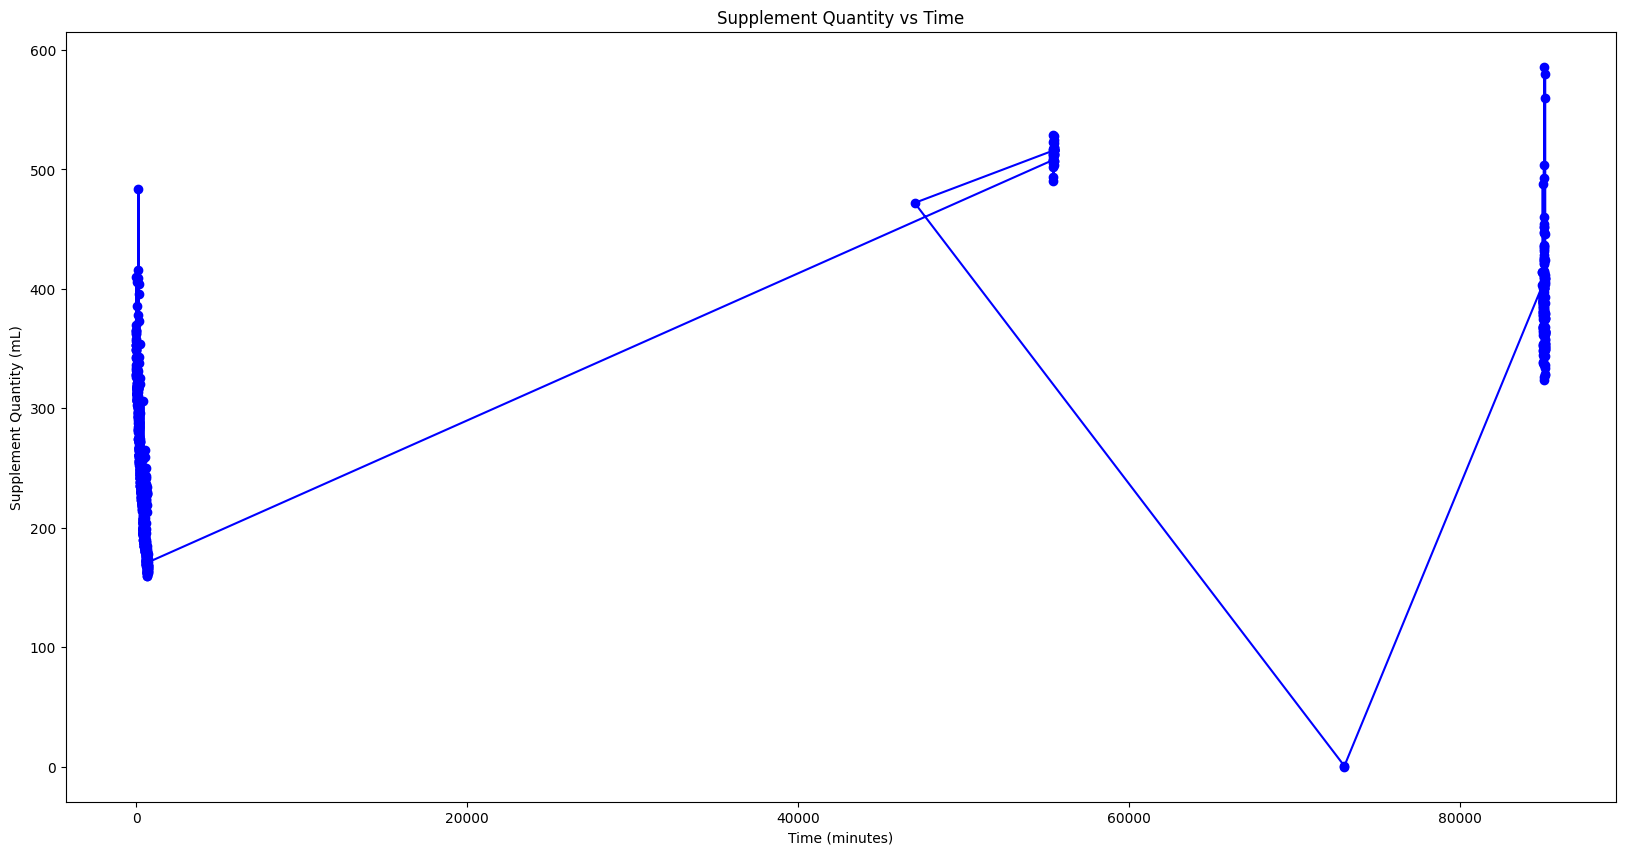

In [55]:
#plot the graph to visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(processed_df['DateTime_numeric'], processed_df['Supplement Quantity( mL )'], marker='o',color='blue')

plt.title('Supplement Quantity vs Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Supplement Quantity (mL)')